In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import urduhack
from urduhack.normalization import normalize
from urduhack.preprocessing import normalize_whitespace, remove_punctuation, remove_accents, replace_urls, replace_emails, replace_numbers, replace_currency_symbols, remove_english_alphabets


In [2]:
train = pd.read_excel('train.xlsx')

test = pd.read_excel('test.xlsx')

validation = pd.read_excel('val.xlsx')


emotions_to_labels = {'positive': 1, 'negative': 0}
labels_to_emotions = {j:i for i,j in emotions_to_labels.items()}

train['Labels'] = train['sentiment'].replace(emotions_to_labels)
test['Labels'] = test['sentiment'].replace(emotions_to_labels)
validation['Labels'] = validation['sentiment'].replace(emotions_to_labels)


In [3]:
train.head()

,review,sentiment,Labels
0,ہمارے یہاں جو چیزیں ہیں وہ ہر ایک کے ل perfect...,positive,1
1,پی جی فلموں سے کیا تازگی ہوئی تبدیلی ہے جو نوع...,positive,1
2,اب یہ وہی ہے جو ایک خاندانی فلم ہونی چاہئے! حا...,positive,1
3,یہ ایک ہدایتکار کا معیاری کرایہ ہے جو طویل عرص...,positive,1
4,میں ٹی وی سرفنگ کرتے وقت ایک یا دو سال پہلے حا...,positive,1


There are 8000 records in the dataset.



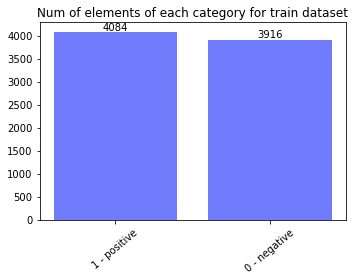

There are 999 records in the dataset.



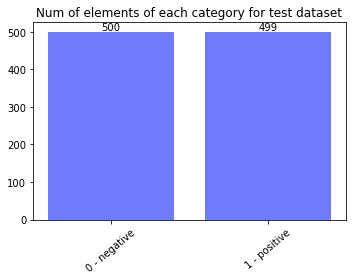

There are 1000 records in the dataset.



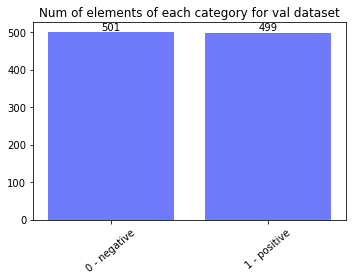

In [3]:
def visualize_labels_distribution(df, title='the'):
  '''
  Accepts a dataframe with 'Emotions' column and dataset title (e.g. 'train')
  Creates bar chart with num of elements of each category
  Returns nothing

  '''
  # create a pandas series with labels and their counts
  num_labels = df['sentiment'].value_counts()

  # num of unique categories
  x_barchart = range(df['sentiment'].nunique())
  # list of labels
  x_barchart_labels = [str(emotions_to_labels[emotion]) +\
                       ' - ' + emotion for emotion in list(num_labels.index)]

  # list of counts
  y_barchart = list(num_labels.values)

  # creating bar chart
  plt.figure(figsize = (5, 4))
  plt.bar(x_barchart, y_barchart, color='#707bfb')

  # adding num of elements for each category on plot as text
  for index, data in enumerate(y_barchart):
    plt.text(x = index, 
            y = data+max(y_barchart)/100, 
            s = '{}'.format(data), 
            fontdict = dict(fontsize=10), 
            ha = 'center',)
  
  plt.xticks(x_barchart, x_barchart_labels, rotation=40)
  plt.title('Num of elements of each category for {} dataset'.format(title))
  plt.tight_layout()

  print('There are {} records in the dataset.\n'.format(len(df.index)))

  plt.show()
    
    
    
    
    
    
visualize_labels_distribution(train, 'train')
visualize_labels_distribution(test, 'test')
visualize_labels_distribution(validation, 'val')

In [4]:
train['review'] = train['review'].apply(normalize) 
train['review'] = train['review'].apply(remove_accents) 
train['review'] = train['review'].apply(replace_urls)
train['review'] = train['review'].apply(replace_emails) 
train['review'] = train['review'].apply(replace_numbers) 
train['review'] = train['review'].apply(remove_english_alphabets) 
train['review'] = train['review'].apply(replace_currency_symbols)
train['review'] = train['review'].apply(normalize_whitespace)

x_train = train['review']
y_train = train['Labels'].values


test['review'] = test['review'].apply(normalize) 
test['review'] = test['review'].apply(remove_accents) 
test['review'] = test['review'].apply(replace_urls)
test['review'] = test['review'].apply(replace_emails) 
test['review'] = test['review'].apply(replace_numbers) 
test['review'] = test['review'].apply(remove_english_alphabets) 
test['review'] = test['review'].apply(replace_currency_symbols)
test['review'] = test['review'].apply(normalize_whitespace)

x_test =  test['review']
y_test = test['Labels'].values


validation['review'] = validation['review'].apply(normalize) 
validation['review'] = validation['review'].apply(remove_accents) 
validation['review'] = validation['review'].apply(replace_urls)
validation['review'] = validation['review'].apply(replace_emails) 
validation['review'] = validation['review'].apply(replace_numbers) 
validation['review'] = validation['review'].apply(remove_english_alphabets) 
validation['review'] = validation['review'].apply(replace_currency_symbols)
validation['review'] = validation['review'].apply(normalize_whitespace)

x_validation = train['review']
y_validation = validation['Labels'].values

In [ ]:
import gensim.downloader as api
model_wiki = api.load('fasttext-wiki-news-subwords-300')


In [5]:
from gensim.models import Word2Vec


In [7]:
model_w2v = Word2Vec(x_train,   # data for model to train on
                 vector_size = 300,                            # embedding vector size
                 min_count = 2).wv 

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [9]:
DICT_SIZE = 15000

# creating a dictionary with most used words
# where num of words = DICT_SIZE
tokenizer = Tokenizer(num_words=DICT_SIZE)
total = x_train + x_train + x_validation
tokenizer.fit_on_texts(total)

In [11]:
list(tokenizer.word_index.items())[:5]

[('کے', 1), ('،', 2), ('میں', 3), ('ہے', 4), ('کی', 5)]

In [12]:
len(tokenizer.word_index)

49475

In [13]:
x_train_max_len = max([len(i) for i in x_train])
x_test_max_len = max([len(i) for i in x_test])
x_validation_max_len = max([len(i) for i in x_validation])

MAX_LEN = max(x_train_max_len, x_test_max_len, x_validation_max_len)

In [14]:
MAX_LEN

11882

In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
# change size of vectors to MAX_LEN and pad indexes 
X_train = tokenizer.texts_to_sequences(x_train)
X_train_pad = pad_sequences(X_train, maxlen=MAX_LEN)

X_test = tokenizer.texts_to_sequences(x_test)
X_test_pad = pad_sequences(X_test, maxlen=MAX_LEN)

X_val = tokenizer.texts_to_sequences(x_validation)
X_val_pad = pad_sequences(X_val, maxlen=MAX_LEN)

In [17]:
X_train[0]

[336,
 83,
 22,
 384,
 19,
 20,
 82,
 9,
 1,
 123,
 789,
 17,
 4,
 22,
 7494,
 5269,
 2279,
 5,
 281,
 3,
 258,
 1621,
 4,
 20,
 215,
 22,
 47,
 11739,
 68,
 313,
 3,
 5020,
 19,
 2,
 59,
 8,
 59,
 5,
 2708,
 165,
 1345,
 897,
 876,
 7874,
 19,
 6,
 88,
 2279,
 692,
 57,
 19,
 39,
 1,
 4898,
 1,
 265,
 42,
 6,
 99,
 5,
 651,
 16,
 142,
 11,
 11740,
 199,
 17,
 412,
 3,
 220,
 1642,
 513,
 6,
 1479,
 7875,
 5,
 498,
 45,
 53,
 40,
 74,
 1,
 123,
 9,
 6,
 21,
 884,
 299,
 283,
 156,
 4,
 2,
 22,
 74,
 1,
 123,
 656,
 61,
 4,
 23,
 867,
 3,
 115,
 61,
 4,
 124,
 12,
 162,
 8,
 38,
 906,
 4,
 2,
 23,
 7,
 14,
 720,
 4,
 135,
 1181,
 1252,
 2686,
 4,
 7,
 5,
 4448,
 3785,
 2,
 112,
 5021,
 6,
 2308,
 11,
 701,
 2687,
 71,
 436,
 4,
 6,
 212,
 140,
 16,
 898,
 4,
 13,
 408,
 20,
 130,
 4,
 52,
 16,
 2,
 22,
 789,
 701,
 11,
 239,
 167,
 35,
 139,
 106,
 1,
 24,
 417,
 5,
 126,
 4,
 22,
 62,
 281,
 10,
 3359,
 3836,
 8,
 282,
 19,
 6,
 128,
 28,
 15,
 35,
 106,
 1,
 24,
 22,
 124,
 7,
 5,
 16

In [18]:
X_train_pad[0]

array([  0,   0,   0, ..., 136, 221, 135])

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [24]:
from tensorflow.keras.callbacks import EarlyStopping
stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [37]:
model = Sequential()

In [38]:
model.add(Bidirectional(LSTM(128, return_sequences=True))) 
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dense(6, activation = 'softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [48]:
model.add(Embedding(input_dim = DICT_SIZE, # the whole vocabulary size
                    output_dim = 15000, # vector space dimension
                    input_length = X_train_pad.shape[1], # max_len of text sequence
                    weights=[15000,300], # assign the embedding weight with embedding marix
                    trainable=False))

In [52]:
history = model.fit(x_train, y_train )

ValueError: in user code:

    File "C:\Users\sulem\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\sulem\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\sulem\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\sulem\anaconda3\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\sulem\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\sulem\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 232, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_3' (type Sequential).
    
    Input 0 of layer "bidirectional" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (32, 1)
    
    Call arguments received by layer 'sequential_3' (type Sequential):
      • inputs=tf.Tensor(shape=(32, 1), dtype=string)
      • training=True
      • mask=None
